<a href="https://colab.research.google.com/github/jugash/Tools/blob/master/ECMM466_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Candidate Number** : 700074037

# Import necessary libraries

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import re
from operator import itemgetter   
import seaborn as sns
import os
from pylab import rcParams
import matplotlib.colors as mcolors
from collections import Counter
import nltk
from nltk.corpus import wordnet as wn

import community.community_louvain as community

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
%cd /content/drive/MyDrive/DataScience/MSC/SNA-ECMM466/

/content/drive/MyDrive/DataScience/MSC/SNA-ECMM466


# Question 1 : Build and analyse a Co-Occurrence Network

In [ ]:
import nltk
from nltk import tokenize
from nltk import word_tokenize
from nltk import WordNetLemmatizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Question 1.a : Load the Text

In [ ]:
with open("DataScience.txt", "r") as file1:
  FileContent = file1.read()
  print(FileContent)

Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.

Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of in

## Question 1.b : Using nltk and its sentence tokenizer, print the different sentences in text.

Do you spot
anything wrong in the way the tokenizer operates? Motivate your question?


In [ ]:
sentences=tokenize.sent_tokenize(FileContent)
for i,s in enumerate(sentences):
  print(i + 1, ':', s)

1 : Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains.
2 : Data science is related to data mining, machine learning and big data.
3 : Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data.
4 : It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.
5 : However, data science is different from computer science and information science.
6 : Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing beca

## Question 1.c : Using nltk extract word tokens from sentences.

In [ ]:
word_array = [word_tokenize(sent.lower()) for sent in sentences]
words = [item for sublist in word_array for item in sublist]

## Question 1.d : Using Wordnet, lemmatize the tokens

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
wnl=WordNetLemmatizer()
lemmatized_words=[wnl.lemmatize(w) for w in words]
for w1,w2 in zip(words, lemmatized_words):
  print(w1, "=>", w2)

data => data
science => science
is => is
an => an
interdisciplinary => interdisciplinary
field => field
that => that
uses => us
scientific => scientific
methods => method
, => ,
processes => process
, => ,
algorithms => algorithm
and => and
systems => system
to => to
extract => extract
knowledge => knowledge
and => and
insights => insight
from => from
noisy => noisy
, => ,
structured => structured
and => and
unstructured => unstructured
data => data
, => ,
and => and
apply => apply
knowledge => knowledge
and => and
actionable => actionable
insights => insight
from => from
data => data
across => across
a => a
broad => broad
range => range
of => of
application => application
domains => domain
. => .
data => data
science => science
is => is
related => related
to => to
data => data
mining => mining
, => ,
machine => machine
learning => learning
and => and
big => big
data => data
. => .
data => data
science => science
is => is
a => a
`` => ``
concept => concept
to => to
unify => unify
stati

 Explain what is the different between lemmatization and
stemming?

## Question 1.e : Using nltk get rid of stopwords in your lemmatized set of tokens

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_w=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cleaned_words=[w for w in lemmatized_words if w not in stop_w and w.isalnum()]
len(cleaned_words), len(lemmatized_words)

(360, 633)

Briefly report the definition
of a stopword and argue whether they can be important for semantic content analysis or stylometry?


## Question 1.f : Perform a frequency analysis

In [ ]:
nltk.FreqDist(cleaned_words).pprint(maxlen=5)

FreqDist({'data': 39, 'science': 25, 'statistic': 12, 'field': 6, 'big': 6, ...})


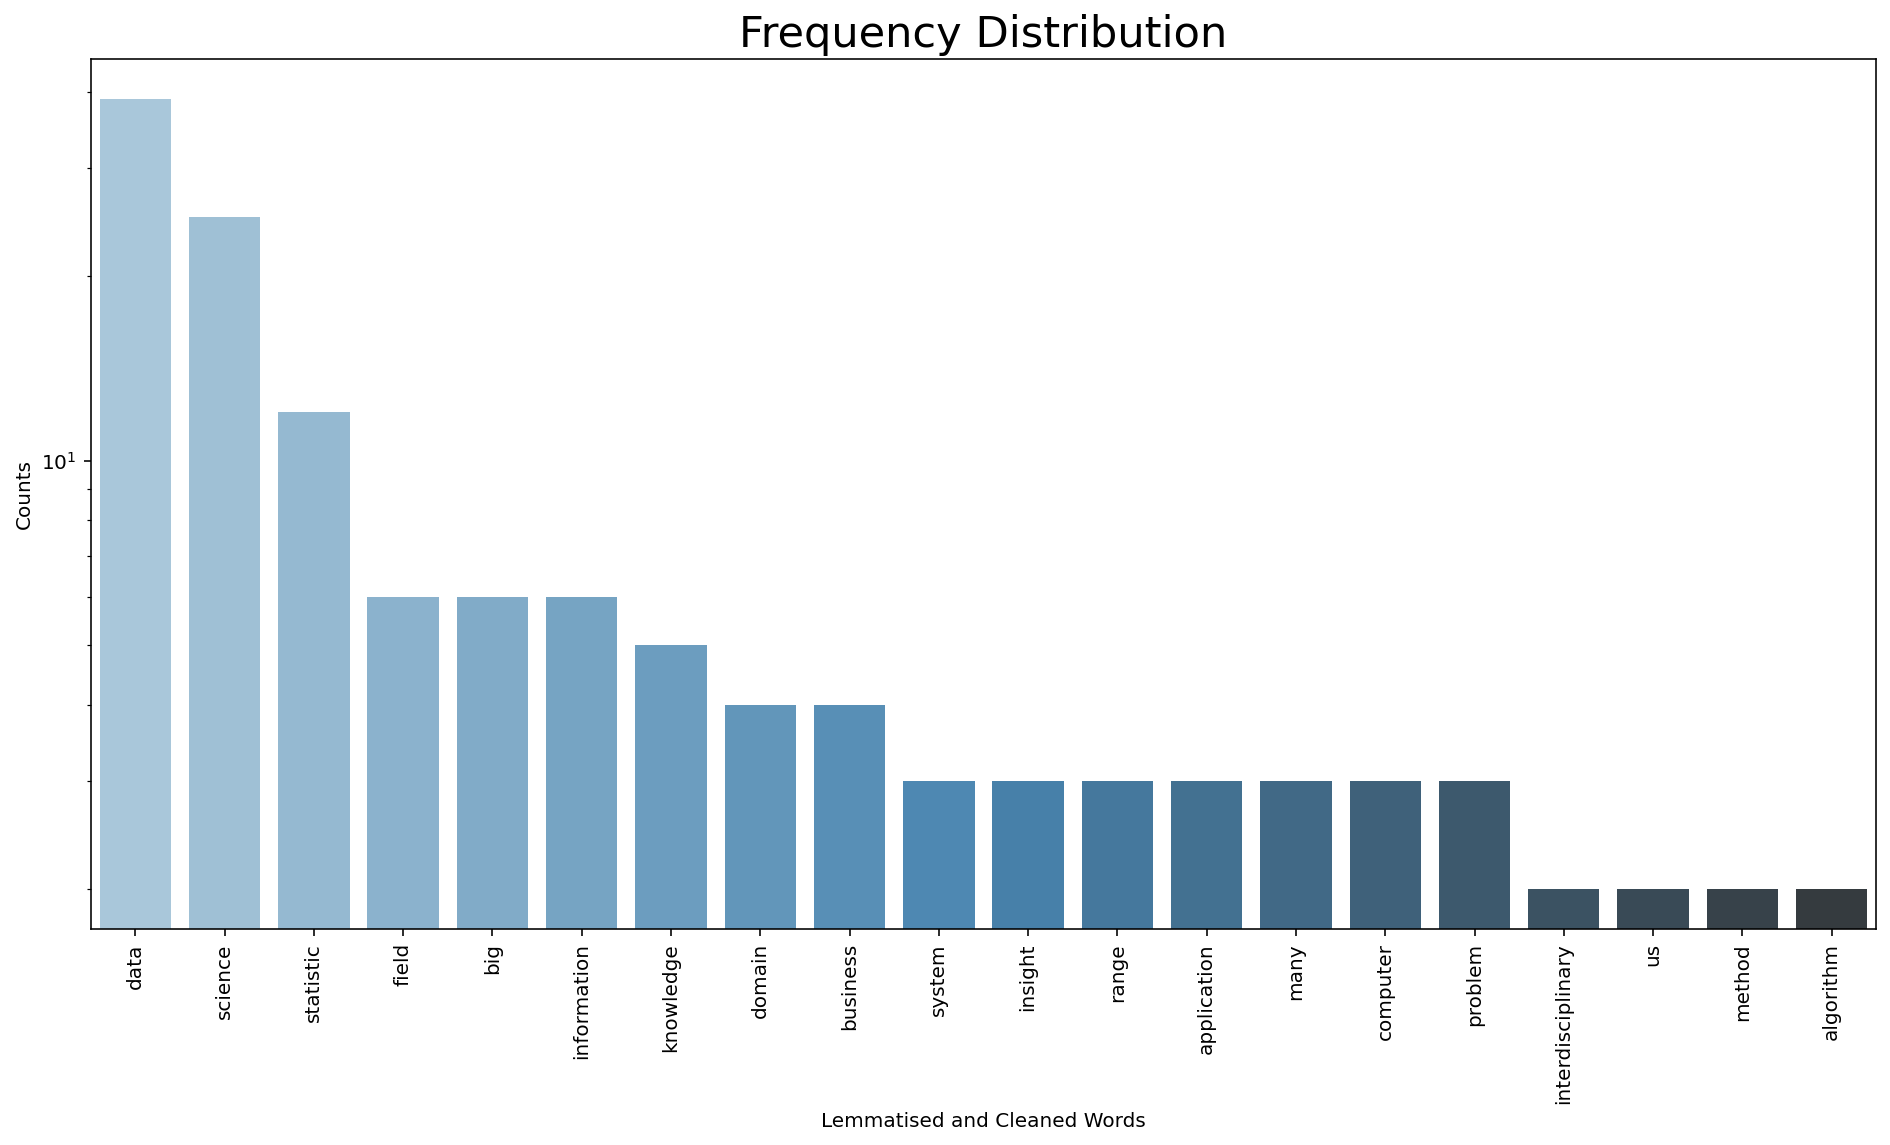

In [ ]:
all_fdist = nltk.FreqDist(cleaned_words).most_common(20)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(16, 8))

frpl1 = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax,palette="Blues_d")
sns.set(font_scale=1.8)
plt.xticks(rotation=90);
frpl1.set(xlabel='Lemmatised and Cleaned Words', ylabel='Counts', title='Frequency Distribution',  yscale = 'log')
plt.show()

# Question 2:  Co-occurrence network analysis

## Question 2.a : Network building

In [ ]:
# nodes1 = [word_tokenize(sent.lower()) for sent in sentences]
nodes2=[]
for k in word_array:
  nodes2.append([wnl.lemmatize(w) for w in k if w not in stop_w and w.isalnum()])

In [ ]:
G = nx.Graph()
for sublist in nodes2:
  edlis=[]
  for i in range(len(sublist)-1):
    edlis.append((sublist[i],sublist[i+1]))
  G.add_edges_from(edlis)

In [ ]:
print("Number of Edges : ", G.number_of_edges())
print("Number of Nodes : ", G.number_of_nodes())

Number of Edges :  294
Number of Nodes :  221


In [ ]:
def get_degree_sequence(G):
  '''Returns the degree sequence of the network (monotonically non-increasing sequence of degrees)
  Attributes:
  G: The networkx object
  '''
  # return the degree of each node and order the list from highest to lowest
  return sorted([d for n, d in G.degree()], reverse=True) 

In [ ]:
def get_degree_count(G):
  ''' Counts  the number of nodes with a certain degree for all degrees in the network
  Attributes:
  G: The networkx object
  '''
  # Get the degree sequence first to count the frequency
  degree_sequence = get_degree_sequence(G)

  # Count the frequency (number of times) of each degree
  degreeCount = collections.Counter(degree_sequence)

  return degreeCount

In [ ]:
def plot_degree_distribution(G, draw_network=False, figsize=(16,8)):
    '''This function plots the degree dustribution as a bar chart and optionally draws the largets connected component 
    
    Attributes:
    G: The networkx object
    draw_network : boolean indicating whether to draw the largest connected component of the network
    figsize: size of the output , passed to matplotlib. Defaults to (16,8)
    ''' 

    # Get the degree frequency
    degreeCount = get_degree_count(G)

    # Function that create lists of iterables, one for the degrees and the other one for the frquencies
    deg, cnt = zip(*degreeCount.items()) 

    # Create the subplots
    fig, ax = plt.subplots(figsize=figsize) 

    # Plot a bar plot with the degrees and their frequencies
    plt.bar(deg, cnt, width=0.80, color='darkblue') 

    # Set plot attributes as title, x and y labels, and ticks with frequencies larger than zero
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    if draw_network:
      #Draw the network inside the barplot
      plt.axes([0.4, 0.4, 0.5, 0.5])

      #Select the largest connected component of the network:
      Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

      # Set the layout of the network
      pos = nx.spring_layout(G) 

      # Remove the axis of the network plot
      plt.axis('off')

      # Plot the nodes and edges
      nx.draw_networkx_nodes(G, pos, node_color= 'r',node_size=20) 
      nx.draw_networkx_edges(G, pos, alpha=0.4) 

    plt.show()

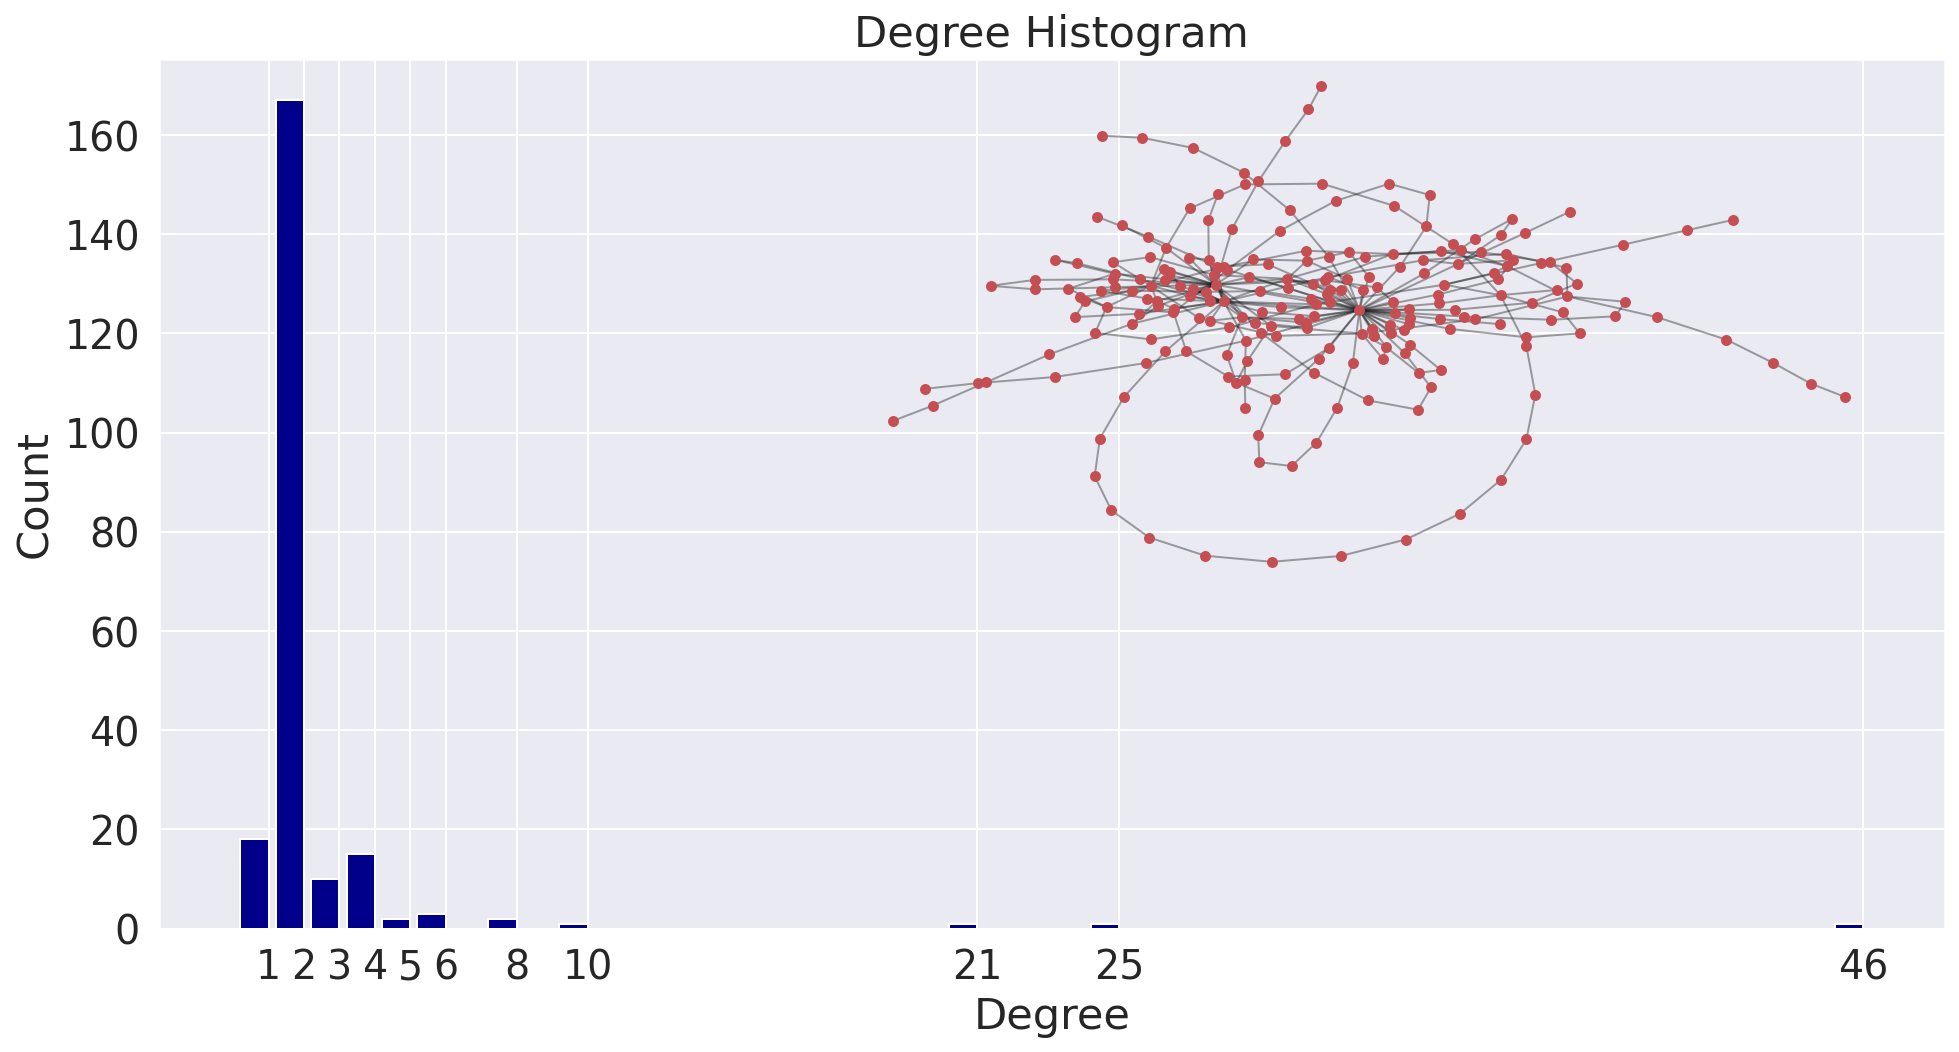

In [ ]:
plot_degree_distribution(G, draw_network=True)

## Question 2.b : Semantic frame analysis

In [ ]:
def draw_network_color(G, measure_func, edge_colors = 'k', keynode=None, pos=None, figsize=(20, 20), cbar_label=None, augment_sizes=True, augment_colors=False, font_size=10):
  '''
  Given a networkx object G draws the graph coloring the nodes based on centrality measure. Highlights the keynode in specified color with specified size 
  Attributes:
  G: The networkx object
  measure_func : A function that returns a dict of mappings from node to a measure to color the graph by
  pos : layout dict
  figsize: size of the output , passed to matplotlib. Defaults to (20,12)
  cbar_label: label to be used on the color bar
  augment_sizes : Flag indicating whether to draw node sizes based on values returned by measure_func
  augment_color : Flag indicating whether to draw node colors based on values returned by measure_func
  font_size : The font size of the label 
  '''
  # draw the figure
  plt.figure(figsize=figsize)

  # calculate the layout if none specified 
  if pos == None:
    pos = nx.kamada_kawai_layout(G)

  # get the measurements for each node
  measure_dict = measure_func(G)
  # sort the nodes based on the measurement
  sorted_nodes = sorted(measure_dict, key=measure_dict.get, reverse=False) 
  #sort the measurements
  measure = sorted(measure_dict.values(), reverse=False)
  
  # draw the edges
  edges = nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, alpha=0.7, width=0.75)

  # if asked to colr based on metric
  if augment_colors:
    # Get the color map with number of colors equal to number of distinct values
    cmap = plt.cm.get_cmap('Oranges', len(set(measure)))
    # map the colors to measure values
    node_colors = cmap(measure)
  else:
    node_colors = 'tab:orange'

  # if asked to size the nodes based on metric
  if augment_sizes:
    # Set the sizes based on measure
    node_sizes = [m * 150 for m in measure]
  else:
    node_sizes = 200

  # draw the nodes with the colors calculated
  nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=sorted_nodes, node_size=node_sizes, node_color=node_colors, alpha=1)

  # draw the labels
  labels = nx.draw_networkx_labels(G, pos=pos, labels={v:v for v in G.nodes}, font_size=font_size, font_color='k')

  if  keynode:
    # highlight the keynode
    nx.draw_networkx_nodes(G, pos=pos, nodelist=[keynode], node_color='green', node_size=[150 * measure_dict[keynode]])

  if augment_colors:
    # set the cmap so that the colorbar can use the same scheme
    nodes.cmap = cmap
    # set edge color to purple to show the lighter nodes
    # nodes.set_edgecolor('tab:purple')
    # plot the colorbar with node colors
    cb = plt.colorbar(nodes, label=cbar_label, shrink=0.5)
    # set colorbar ticks length to zero
    cb.ax.tick_params(length=0)
    cb.ax.set_yticklabels([0, *set(measure)])

  # remove axis and show plot
  plt.axis('off')
  plt.show()


In [ ]:
def semantic_frame(network, target):
  draw_network_color(nx.ego_graph(network, target, radius=1), lambda G: {u:v for u,v in G.degree()}, figsize=(12,12), font_size=14)

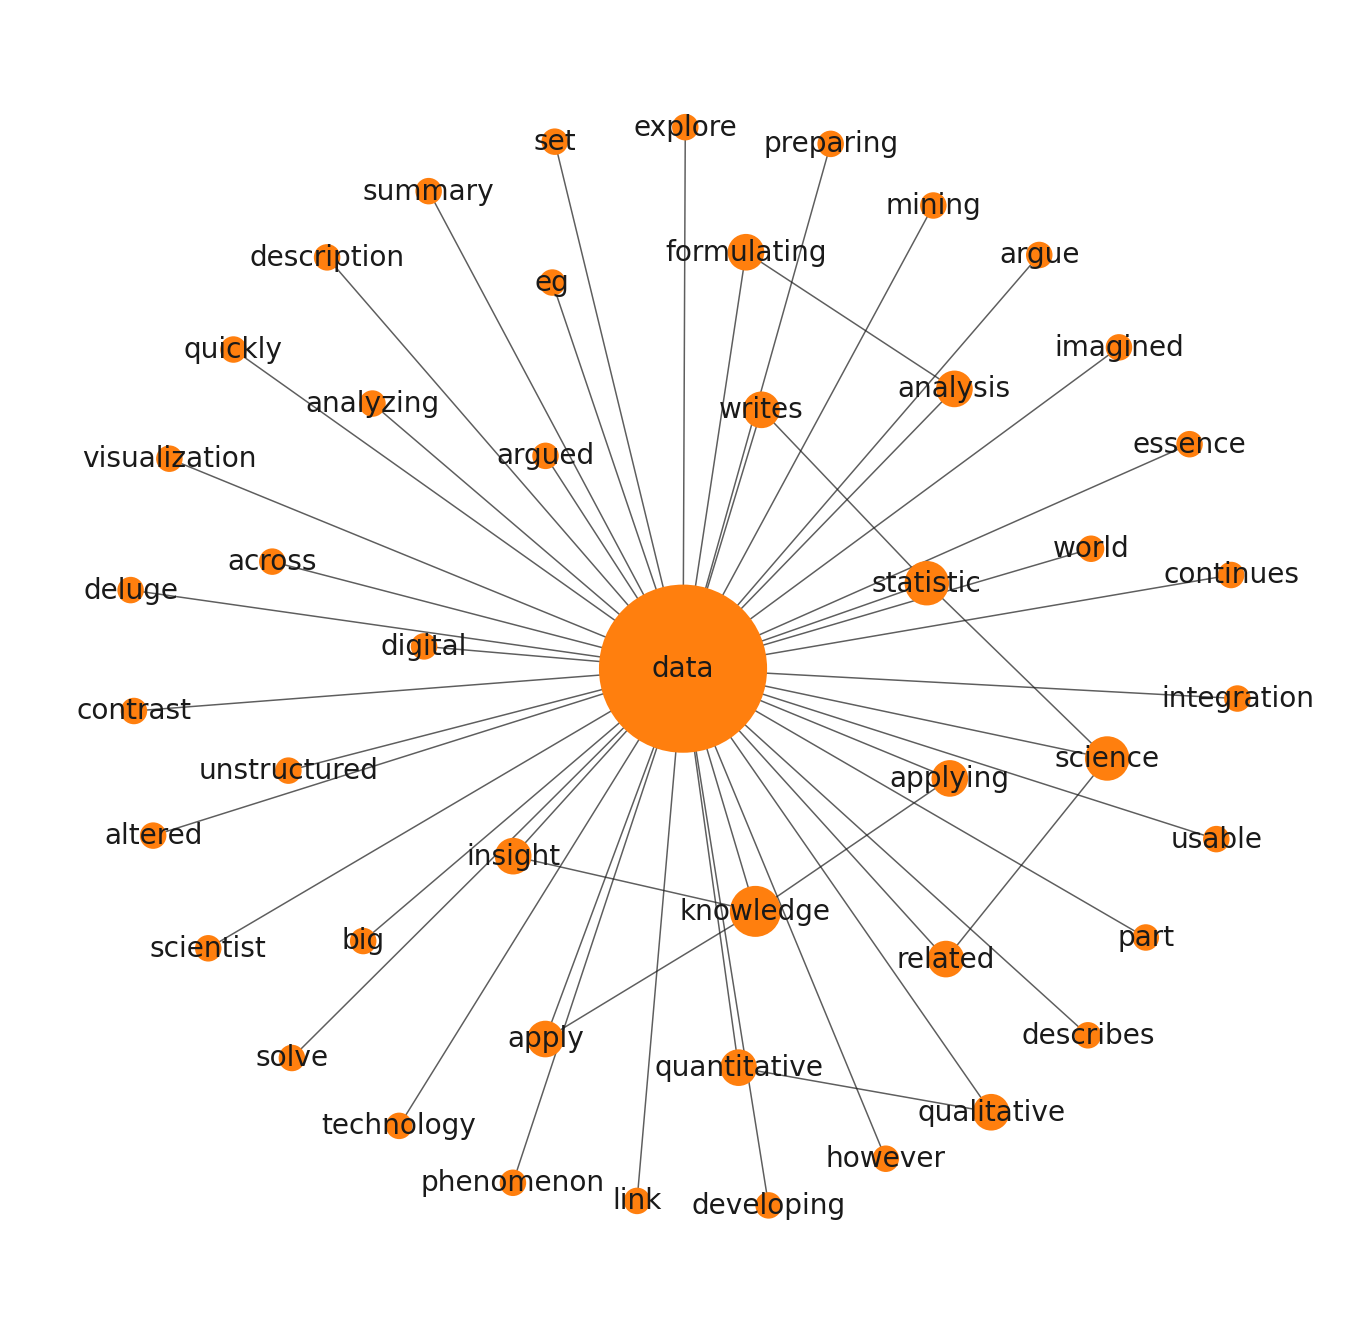

In [ ]:
semantic_frame(G, 'data')

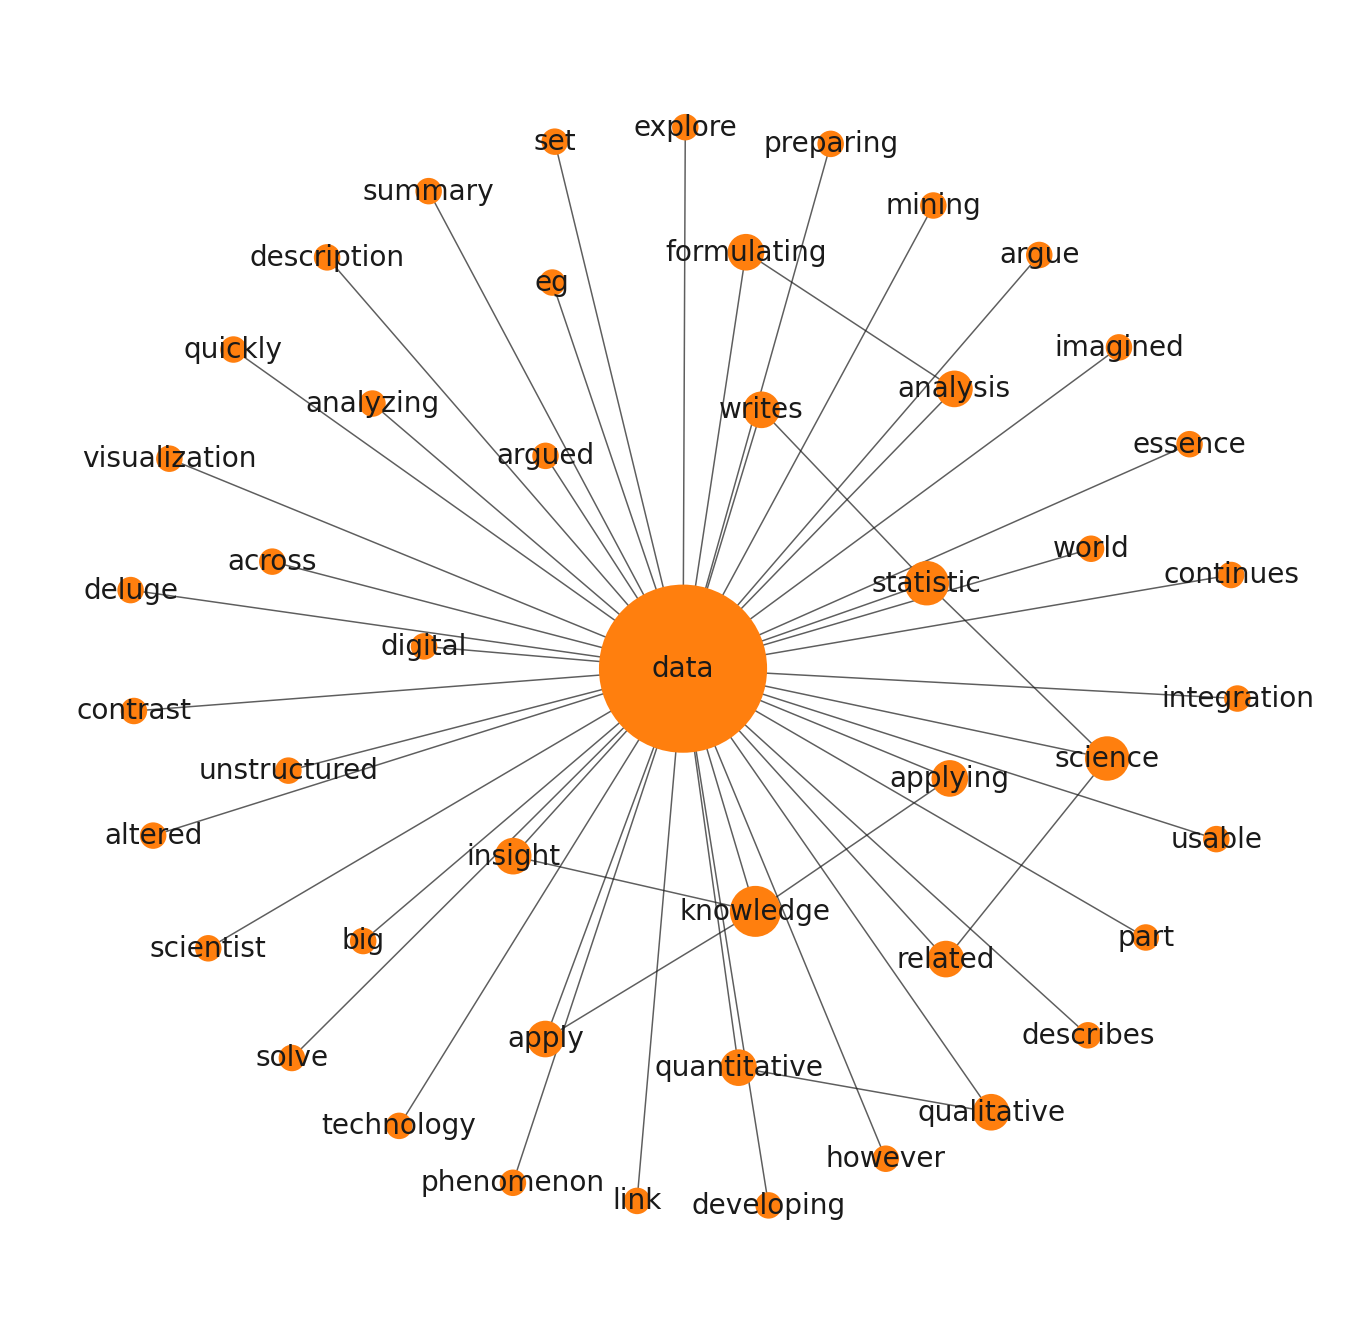

In [ ]:
draw_network_color(nx.ego_graph(G, 'data', radius=1), lambda G: {u:v for u,v in G.degree()}, figsize=(12, 12), cbar_label='Node Degree', augment_sizes=True, augment_colors=False, font_size=14)

## Question 2.c : Semantic content analysis via network metrics

In [ ]:
# calculate degree, closeness and betweenness centralities
degr = nx.degree_centrality(G)
clos = nx.closeness_centrality(G)
betw = nx.betweenness_centrality(G)

# create data frame
dataf = pd.DataFrame([degr, clos, betw]).transpose()
dataf.columns = ['Degree', 'Closeness', 'Betweenness' ]
dataf

,Degree,Closeness,Betweenness
data,0.209091,0.350318,0.635106
science,0.113636,0.320233,0.305475
interdisciplinary,0.009091,0.252005,0.011574
field,0.045455,0.221106,0.063368
us,0.013636,0.189166,0.006887
...,...,...,...
well,0.009091,0.244989,0.035866
due,0.009091,0.198020,0.027024
close,0.009091,0.165913,0.018099
relationship,0.009091,0.142579,0.009091


In [ ]:
for col in dataf.columns:
  print(f'{col} Centrality : Top 10 elements =>', list(dataf.nlargest(n=10, columns=[col]).index))

Degree Centrality : Top 10 elements => ['data', 'science', 'statistic', 'field', 'knowledge', 'information', 'system', 'problem', 'business', 'big']
Closeness Centrality : Top 10 elements => ['data', 'science', 'statistic', 'related', 'writes', 'altered', 'knowledge', 'preparing', 'insight', 'big']
Betweenness Centrality : Top 10 elements => ['data', 'science', 'statistic', 'business', 'altered', 'knowledge', 'field', 'system', 'management', 'size']


In terms of semantic prominence,
what does it mean for ’problems’ to have a relatively higher closeness centrality but lower degree compared to
other top-ranked words?


In [ ]:
dataf.loc['problem']

Degree         0.027273
Closeness      0.249433
Betweenness    0.031299
Name: problem, dtype: float64

In [ ]:
def semantic_frame(network, target):
  draw_network_color(nx.ego_graph(network, target, radius=1), lambda G: {u:v for u,v in G.degree()}, target, figsize=(8,8), font_size=14)

## Question 2.d : Semantic enrichment

In [ ]:
syns = wn.synsets("focus", lang='eng')
[syn.name() for syn in syns]

['focus.n.01',
 'focus.n.02',
 'focus.n.03',
 'focus.n.04',
 'stress.n.03',
 'focus.n.06',
 'focus.n.07',
 'concentrate.v.02',
 'focus.v.02',
 'concenter.v.01',
 'focus.v.04',
 'focus.v.05']

In [ ]:
for syn in syns:
  print(syn.definition())

the concentration of attention or energy on something
maximum clarity or distinctness of an image rendered by an optical system
maximum clarity or distinctness of an idea
a central point or locus of an infection in an organism
special emphasis attached to something
a point of convergence of light (or other radiation) or a point from which it diverges
a fixed reference point on the concave side of a conic section
direct one's attention on something
cause to converge on or toward a central point
bring into focus or alignment; to converge or cause to converge; of ideas or emotions
become focussed or come into focus
put (an image) into focus; we cannot enjoy the movie"


In [ ]:
def syn_extract(wor):
  """
  Given a word find all the synonyms of the word in various sense of the word.

  Attributes:
  wor -  The word to find synonymos for as a string
  """

  # get different senses of the word
  syns = wn.synsets(wor)
  # lemmas give the synonyms in a sense of the word. Pick the first one
  synames = [item.lemmas()[0].name() for item in syns]
  # convert it into a list with only unique values
  synames2 = list(dict.fromkeys(synames))
  return synames2

In [ ]:
# create a list of words(nodes)
nodeche = list(G.nodes())
enrich1 = []
# append all synonyms for each word
for lemma in nodeche:
  enrich1.append(syn_extract(lemma))

# filter out the words from the above list that don't belong to the original network
enrich2 = []
for k in range(len(enrich1)):
  enrich2.append([j for j in list(dict.fromkeys(enrich1[k])) if j in nodeche])

In [ ]:
new_edges=[]
# create new edges from each node to the synonym node (within the network)
for k in range(len(nodeche)):
  new_edges.extend([(nodeche[k],item) for item in enrich2[k]])

# Remove self links
sem_enri=[item for item in new_edges if item[0] != item[1]]
sem_enri

[('science', 'skill'),
 ('process', 'action'),
 ('system', 'organization'),
 ('apply', 'use'),
 ('broad', 'wide'),
 ('range', 'image'),
 ('domain', 'world'),
 ('learning', 'determine'),
 ('big', 'large'),
 ('information', 'data'),
 ('focused', 'focus'),
 ('extracting', 'extract'),
 ('set', 'determine'),
 ('large', 'big'),
 ('see', 'understand'),
 ('see', 'determine'),
 ('applying', 'use'),
 ('applying', 'apply'),
 ('wide', 'broad'),
 ('analyzing', 'analyze'),
 ('presenting', 'award'),
 ('finding', 'determine'),
 ('control', 'see'),
 ('identified', 'name'),
 ('argued', 'argue'),
 ('applied', 'use'),
 ('applied', 'apply'),
 ('operation', 'process')]

In [ ]:
def get_edge_colors(G):
  return [attrib_dict['color'] for (u,v, attrib_dict) in list(G.edges.data())]

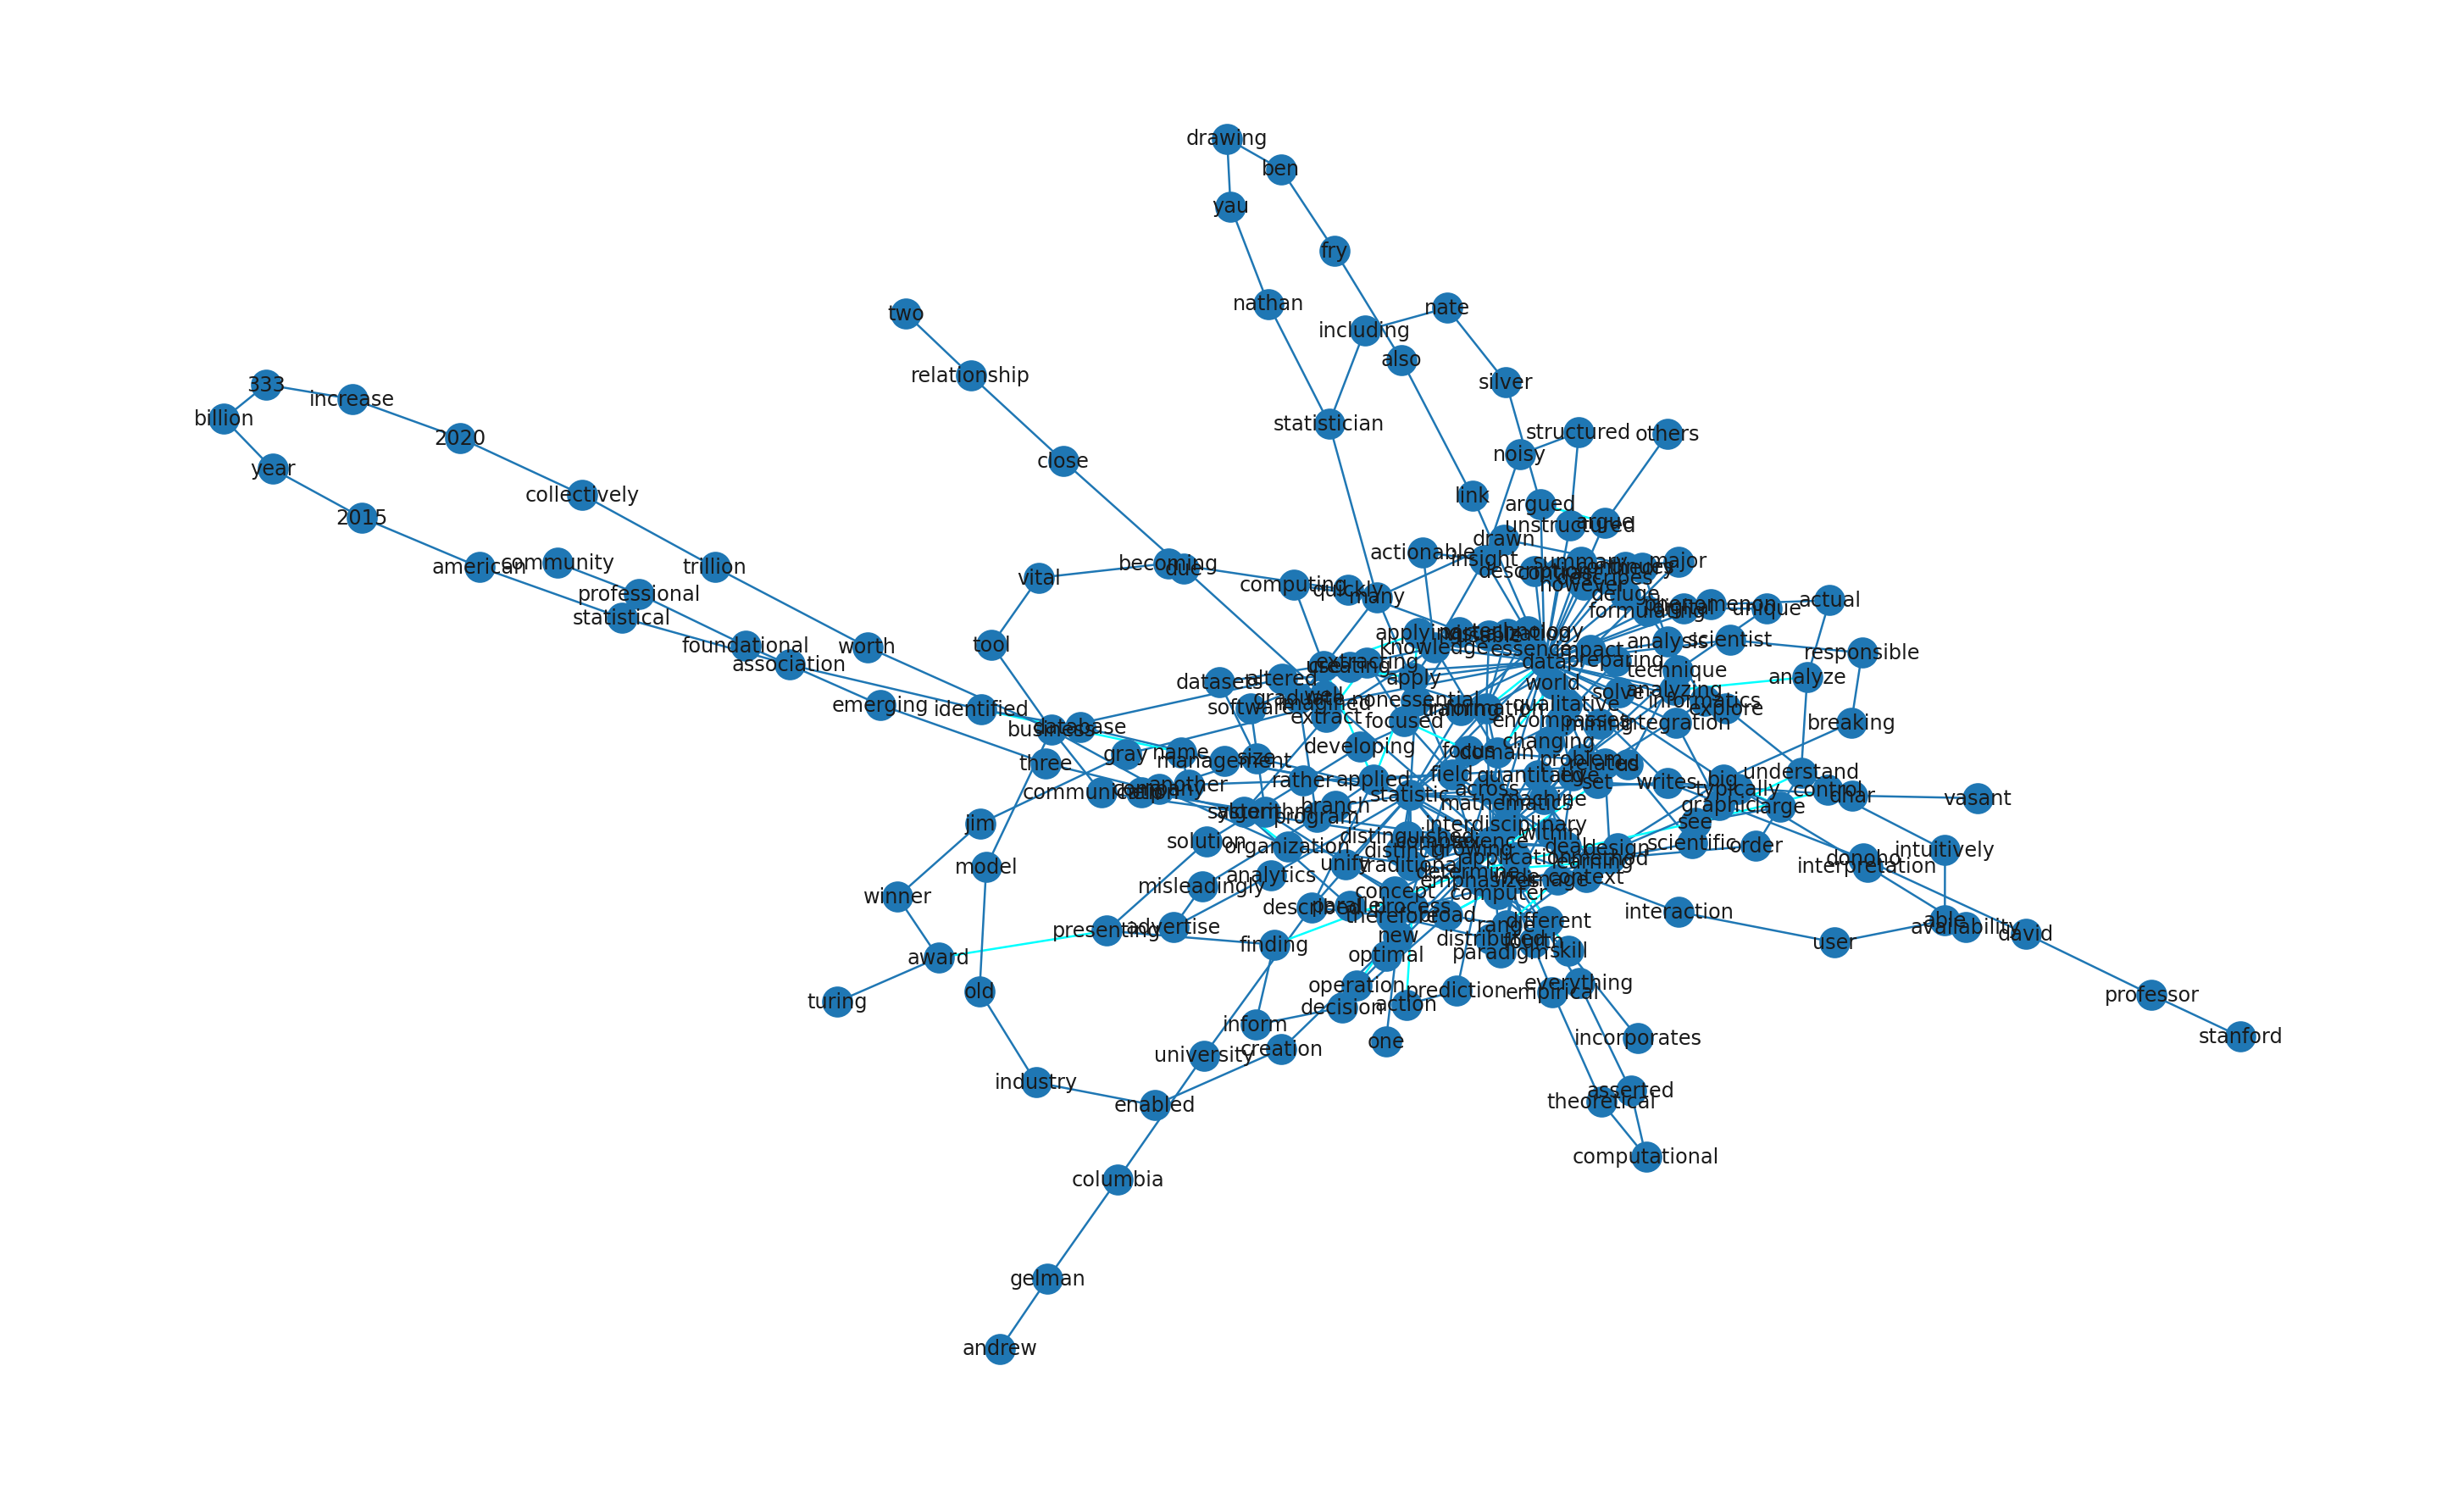

In [ ]:
# create multi-graph that allows multiple links between same nodes
M = nx.MultiGraph()
# Add the original links (co-occurence)
M.add_edges_from(list(G.edges()), color="tab:blue")
# Add the semantic links
M.add_edges_from(sem_enri, color="cyan")

# create the plot to draw teh network
plt.figure(figsize=(20,12)) 
#draw the plot with the edge colors and labels
nx.draw(M, with_labels=True, font_size=12, edge_color=get_edge_colors(M), width=1.25, node_color='tab:blue')
plt.show()

Comment over the key differences in links between the original
and the enriched network as in to report on the results of this approach to your line manager?

## Question 2.e : Semantic frame analysis II

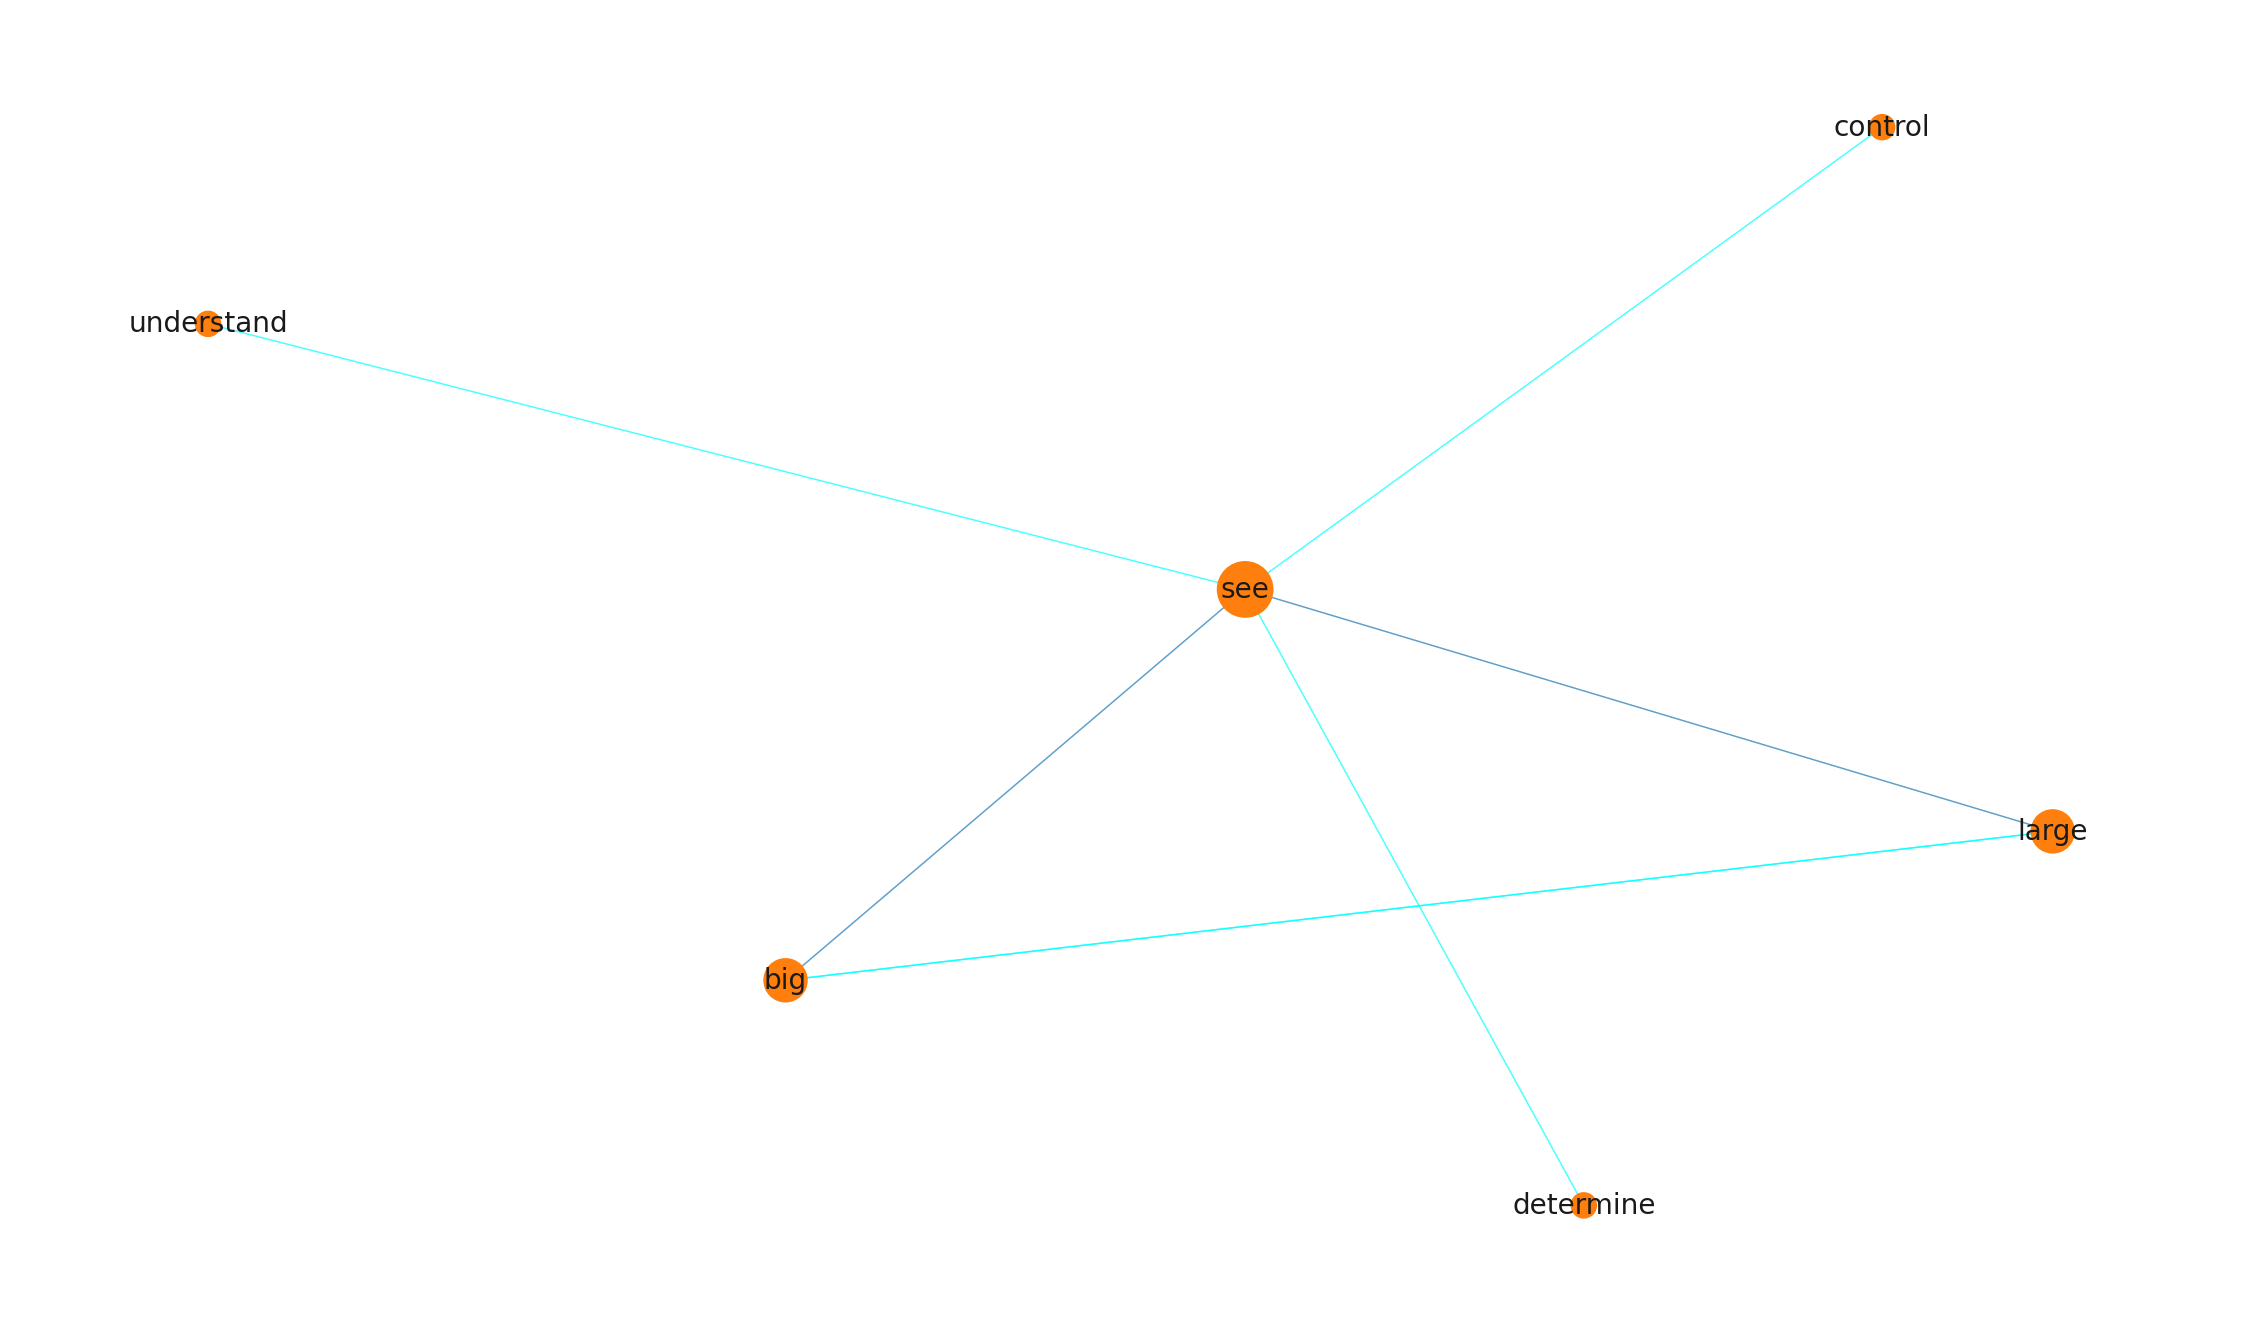

In [ ]:
def semantic_enriched_frame(network, target):
  SG=nx.ego_graph(network, target, radius=1)
  draw_network_color(SG, lambda G: {u:v for u,v in G.degree()}, get_edge_colors(SG), figsize=(20,12), font_size=14)

semantic_enriched_frame(M, 'see')

## Question 2.f :  Topic analysis via community detection

In [ ]:
def topic_visualiser(G, target):
  communities = community.best_partition(G)
  SG=G.subgraph([v for v,c in communities.items() if c == communities[target]])
  draw_network_color(SG, lambda G: {u:v for u,v in G.degree()}, get_edge_colors(SG), figsize=(12,12), font_size=14)

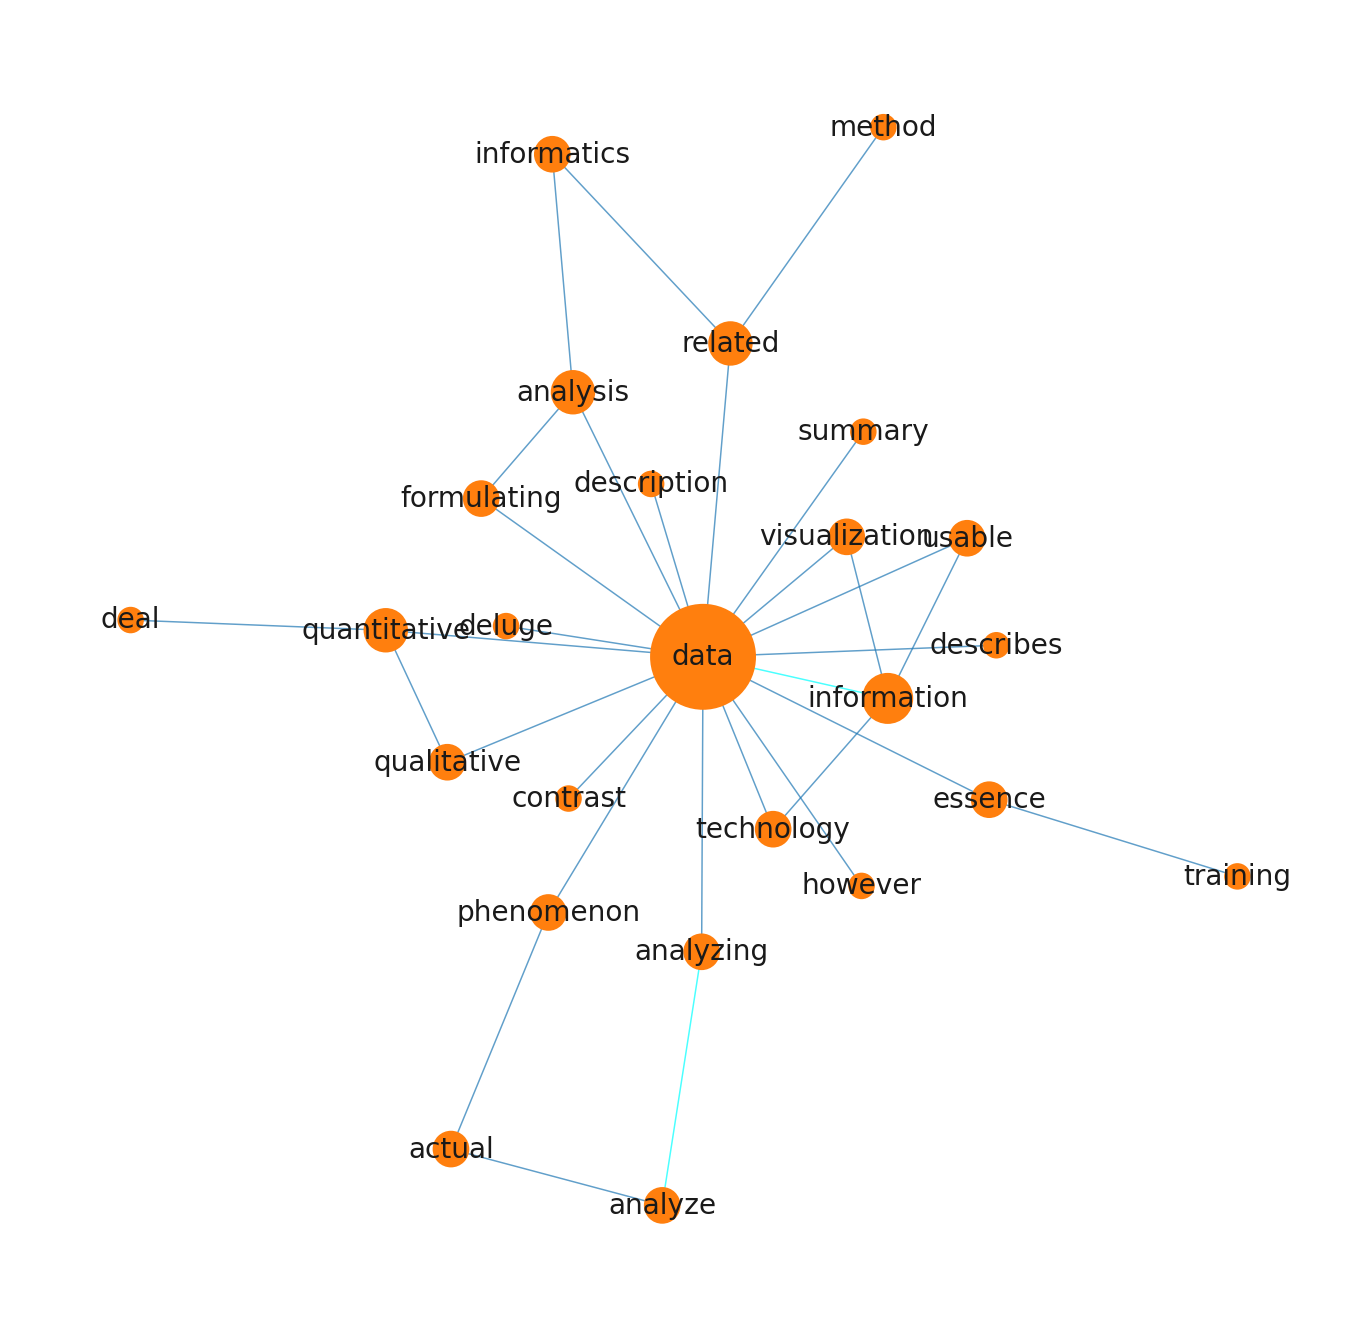

In [ ]:
topic_visualiser(M, 'data')

 Provide some brief comments about the way the
community content and structure portray the concept of ”data”: are there common semantic areas between
concepts in the community?

# Question 3 :  Sentiment analysis

In [ ]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]